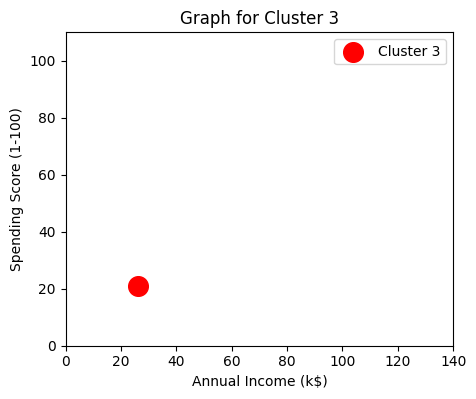

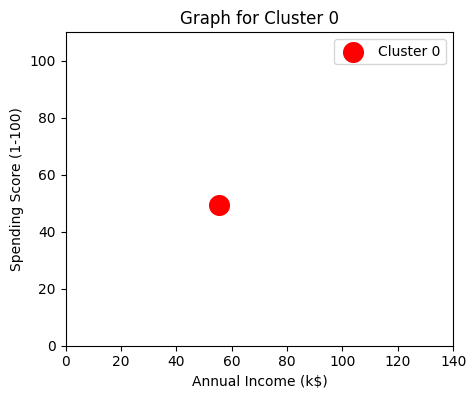

In [2]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import joblib
import numpy as np

# Load the KMeans model
model = joblib.load('finalclustering.pkl')

cluster_descriptions = {
    0: "Cluster 0: Customers with moderate annual income and moderate spending score. There is a high possibility to sell the products to this category.",
    1: "Cluster 1: Customers with high annual income and a high spending score. Even these categories are possible.",
    2: "Cluster 2: Customers with high annual income but a low spending score. These categories save money, which is not so suitable to buy things.",
    3: "Cluster 3: Customers with low annual income and a low spending score. These categories are not suitable as income is low.",
    4: "Cluster 4: Includes customers with low annual income and a high spending score."
}

# Create the main window
root = tk.Tk()
root.title("Customer Segmentation")
root.geometry("1200x800")
root.configure(bg="#f5f5f5")

# Function to update the graph based on valid inputs
def predict_cluster_and_update_graph():
    try:
        # Clear previous graph if any
        for widget in graph_frame.winfo_children():
            widget.destroy()

        # Get inputs
        annual_income = float(entry_income.get())
        spending_score = float(entry_score.get())

        # Validate input ranges
        if annual_income < 0 or annual_income > 137:
            messagebox.showerror("Input Error", "Annual Income must be between 0 and 137 (in k$).")
            return

        if spending_score < 1 or spending_score > 100:
            messagebox.showerror("Input Error", "Spending Score must be between 1 and 100.")
            return

        # Predict the cluster
        cluster = model.predict([[annual_income, spending_score]])[0]
        description = cluster_descriptions[cluster]

        # Update cluster description label
        description_label.config(text=f"Cluster: {cluster}\n{description}")

        # Generate graph for the predicted cluster
        all_data = np.array(model.cluster_centers_)
        cluster_data = all_data[cluster]

        fig, ax = plt.subplots(figsize=(5, 5))
        ax.scatter(cluster_data[0], cluster_data[1], color='red', label=f'Cluster {cluster}', s=200)
        ax.set_xlim(0, 140)
        ax.set_ylim(0, 110)
        ax.set_xlabel("Annual Income (k$)")
        ax.set_ylabel("Spending Score (1-100)")
        ax.legend()
        ax.set_title(f"Graph for Cluster {cluster}")

        # Embed the graph in the tkinter window
        canvas = FigureCanvasTkAgg(fig, master=graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Header section
header_label = tk.Label(root, text="Customer Segmentation", font=("Arial", 24, "bold"), bg="#007acc", fg="white", height=2)
header_label.pack(fill="x")

# Input frame
input_frame = tk.Frame(root, bg="#f5f5f5")
input_frame.pack(pady=20)

tk.Label(input_frame, text="Annual Income (k$):", font=("Arial", 12), bg="#f5f5f5").grid(row=0, column=0, padx=10, pady=5, sticky="w")
entry_income = tk.Entry(input_frame, font=("Arial", 12), width=25)
entry_income.grid(row=0, column=1, padx=10, pady=5)

tk.Label(input_frame, text="Spending Score (1-100):", font=("Arial", 12), bg="#f5f5f5").grid(row=1, column=0, padx=10, pady=5, sticky="w")
entry_score = tk.Entry(input_frame, font=("Arial", 12), width=25)
entry_score.grid(row=1, column=1, padx=10, pady=5)

predict_button = tk.Button(input_frame, text="Predict and Show Graph", font=("Arial", 12, "bold"), bg="#4CAF50", fg="white", command=predict_cluster_and_update_graph)
predict_button.grid(row=2, column=0, columnspan=2, pady=20)

# Description section
description_label = tk.Label(root, text="Cluster description will appear here.", font=("Arial", 14), bg="#f5f5f5", wraplength=800, justify="left")
description_label.pack(pady=10)

# Graph frame
graph_frame = tk.Frame(root, bg="#f5f5f5")
graph_frame.pack(pady=20, fill="both", expand=True)

root.mainloop()


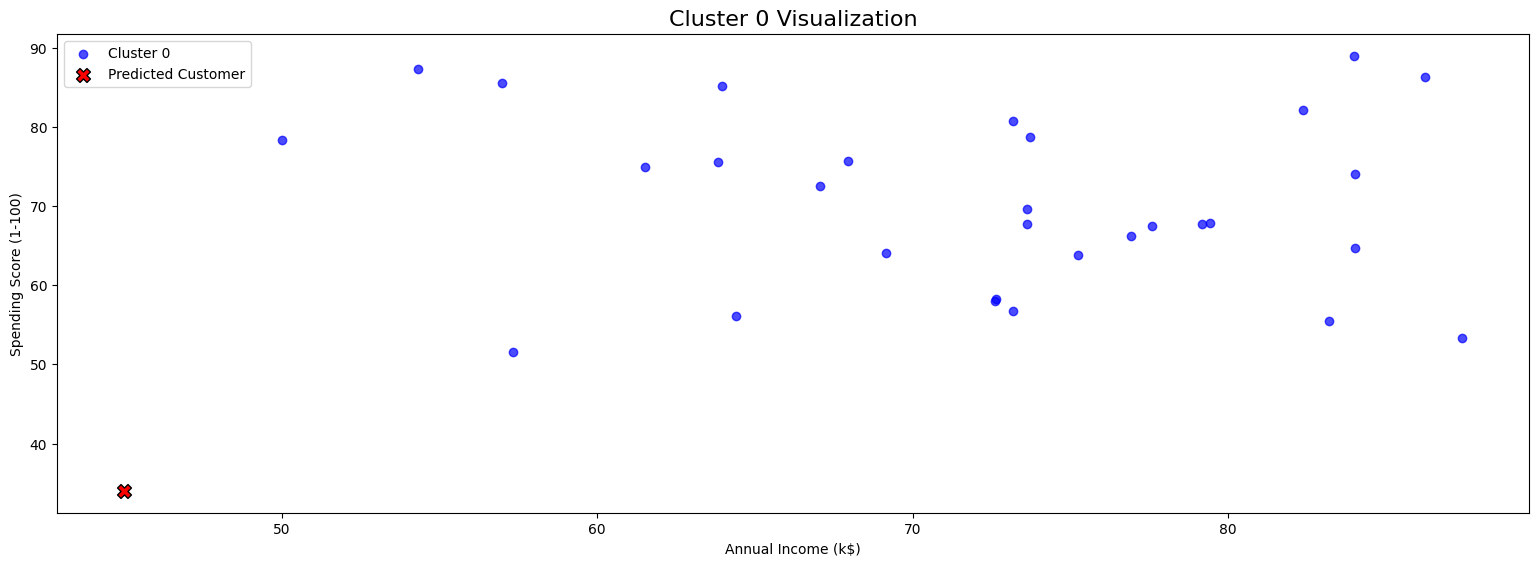

In [4]:
import tkinter as tk
from tkinter import font
import joblib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

# Load the saved KMeans model
model = joblib.load('finalclustering.pkl')

# Generate synthetic data for the clusters based on updated descriptions
data_clusters = {
    0: np.random.rand(30, 2) * [40, 40] + [50, 50],  # Moderate income and spending
    1: np.random.rand(30, 2) * [20, 20] + [100, 80],  # High income and spending
    2: np.random.rand(30, 2) * [20, 30] + [100, 20],  # High income, low spending
    3: np.random.rand(30, 2) * [20, 20] + [10, 10],  # Low income, low spending
    4: np.random.rand(30, 2) * [20, 20] + [20, 80],  # Low income, high spending
}

# Cluster descriptions
cluster_descriptions = {
    0: "Cluster 0: Customers with moderate annual income and moderate spending score. High possibility to sell products.",
    1: "Cluster 1: Customers with high annual income and high spending score. Potentially profitable group.",
    2: "Cluster 2: Customers with high annual income but low spending score. Savings-oriented group, not ideal for selling.",
    3: "Cluster 3: Customers with low annual income and low spending score. Unsuitable group due to low income.",
    4: "Cluster 4: Customers with low annual income and high spending score. Unique opportunity to engage.",
}

# Initialize the main window and global canvas reference
root = tk.Tk()
root.title("Customer Segmentation")
root.state("zoomed")
root.config(bg="#f5f5f5")
root.resizable(True, True)
canvas = None  # Global variable to hold the canvas instance


def predict_cluster():
    global canvas  # Reference the global canvas variable
    try:
        # Get the input values from the entry fields
        annual_income = float(entry_income.get())
        spending_score = float(entry_score.get())

        # Validate the input ranges
        if annual_income < 0 or annual_income > 137:
            result_label.config(
                text="Error: Annual Income must be between 0 and 137 (in k$).", fg="red"
            )
            return

        if spending_score < 1 or spending_score > 100:
            result_label.config(
                text="Error: Spending Score must be between 1 and 100.", fg="red"
            )
            return

        # Predict the cluster
        cluster = model.predict([[annual_income, spending_score]])[0]
        description = cluster_descriptions.get(
            cluster, "No description available for this cluster."
        )

        # Display the predicted cluster and its description in the result label
        result_label.config(
            text=f"This customer belongs to Cluster: {cluster}\n{description}", fg="green"
        )

        # Clear any existing plot
        if canvas:
            canvas.get_tk_widget().destroy()
            canvas = None

        # Create a graph to show only the predicted cluster
        plot_predicted_cluster(cluster, (annual_income, spending_score))

    except ValueError:
        result_label.config(
            text="Error: Please enter valid numeric values.", fg="red"
        )


def plot_predicted_cluster(predicted_cluster, customer_point):
    global canvas  # Reference the global canvas variable
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get the points for the predicted cluster
    points = data_clusters[predicted_cluster]
    x, y = points[:, 0], points[:, 1]

    # Plot the predicted cluster's data points
    ax.scatter(x, y, label=f"Cluster {predicted_cluster}", c="blue", alpha=0.7)

    # Highlight the predicted customer's data point
    ax.scatter(
        customer_point[0],
        customer_point[1],
        c="red",
        label="Predicted Customer",
        s=100,
        edgecolors="black",
        marker="X",
    )

    # Set labels, legend, and title
    ax.set_title(f"Cluster {predicted_cluster} Visualization", fontsize=16)
    ax.set_xlabel("Annual Income (k$)")
    ax.set_ylabel("Spending Score (1-100)")
    ax.legend()

    # Embed the plot in the Tkinter app
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(padx=10, pady=10, expand=True, fill="both")
    canvas.draw()


# HEADER: Title Section
header_frame = tk.Frame(root, bg="#007acc", height=70)
header_frame.pack(fill="x")

title_label = tk.Label(
    header_frame,
    text="Customer Segmentation",
    font=("Helvetica", 20, "bold"),
    fg="white",
    bg="#007acc",
)
title_label.pack(pady=20)

# MAIN CONTENT: Form Section
form_frame = tk.Frame(root, bg="#ffffff", bd=2, relief="groove", padx=20, pady=20)
form_frame.pack(padx=20, pady=30, fill="both", expand=False)

# Input for Annual Income
label_income = tk.Label(
    form_frame,
    text="Annual Income (k$):",
    font=("Arial", 12),
    fg="#333",
    bg="#ffffff",
    justify="center"
)
label_income.grid(row=0, column=0, pady=10, sticky="w")

entry_income = tk.Entry(form_frame, font=("Arial", 12), bd=2, relief="solid", width=25)
entry_income.grid(row=0, column=1, pady=10)

# Input for Spending Score
label_score = tk.Label(
    form_frame,
    text="Spending Score (1-100):",
    font=("Arial", 12),
    fg="#333",
    bg="#ffffff",
    justify="center"
)
label_score.grid(row=1, column=0, pady=10, sticky="w")

entry_score = tk.Entry(form_frame, font=("Arial", 12), bd=2, relief="solid", width=25)
entry_score.grid(row=1, column=1, pady=10)

# Predict Button
predict_button = tk.Button(
    form_frame,
    text="Predict Cluster",
    font=("Arial", 14, "bold"),
    bg="#4CAF50",
    fg="white",
    width=15,
    height=2,
    relief="flat",
    command=predict_cluster,
)
predict_button.grid(row=2, column=0, columnspan=2, pady=20)

# Label for displaying the result
result_label = tk.Label(
    root,
    text="",
    font=("Arial", 12),
    bg="white",
    fg="black",
    wraplength=600,
    justify="center",
)
result_label.pack(pady=10)

# Run the application
root.mainloop()
